In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

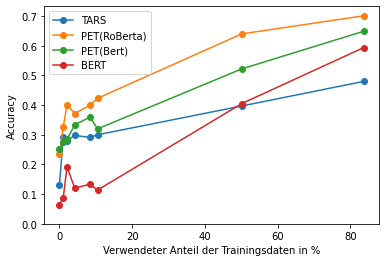

In [11]:
train_data = [0,9,18,36,72,90,430,718]
train_perc = np.divide(np.array([0,9,18,36,72,90,430,718]), 858)*100
tars =[0.13,0.291,0.28,0.298,0.291,0.30 ,0.397,0.48]
pet_roberta = [0.236,0.325,0.402,0.371 ,0.40,0.423,0.64,0.701]
pet_bert = [0.252,0.276 ,0.285,0.333,0.36,0.32,0.522,0.649]
bert = [0.065,0.088,0.192,0.12033,0.13333,0.11382,0.405,0.594]
plt.plot(train_perc,tars,'o-')
plt.plot(train_perc,pet_roberta,'o-')
plt.plot(train_perc,pet_bert,'o-')
plt.plot(train_perc,bert,'o-')
plt.legend(['TARS','PET(RoBerta)','PET(Bert)','BERT'])
plt.xlabel('Verwendeter Anteil der Trainingsdaten in %')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0,0.8,0.1))
plt.savefig('0_100Shots_Training.pdf') 

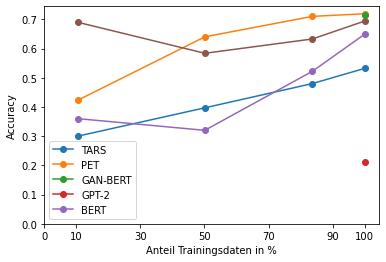

In [5]:
shots = [90,430,718,858]
shots_perc = np.divide(np.array([90,430,718,858]), 858)*100
tars =[0.30 ,0.397,0.48,0.532]
pet_roberta = [0.423,0.64,0.71,0.719]
pet_bert = [0.36,0.32,0.522,0.649]
full=[100]
ganbert=[0.714]
gpt2=[0.213]
bert = [0.68980,0.58367,0.63265,0.694]
plt.plot(shots_perc,tars,'o-')
plt.plot(shots_perc,pet_roberta,'o-')
plt.plot(full,ganbert,'o-')
plt.plot(full,gpt2,'o-')
plt.plot(shots_perc,pet_bert,'o-')
plt.plot(shots_perc,bert,'o-')
plt.legend(['TARS','PET','GAN-BERT','GPT-2','BERT'])
plt.xlabel('Anteil Trainingsdaten in %')
plt.ylabel('Accuracy')
plt.xticks([0,10,30,50,70,90,100]) 
plt.yticks(np.arange(0,0.8,0.1))
plt.savefig('10_858Shots_Training.pdf') 

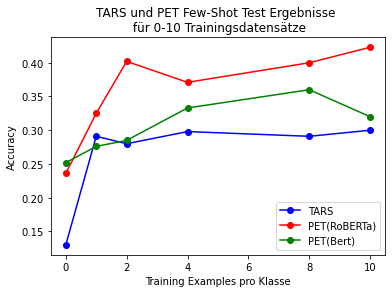

In [15]:
shots = [0,1,2,4,8,10]
tars =[0.13,0.291,0.28,0.298,0.291,0.30]
pet = [0.236,0.325,0.402,0.371 ,0.40,0.423]
pet_bert = [0.252,0.276 ,0.285,0.333,0.36,0.32]
bert = [0.65714,0.62041,0.68980,0.58367,0.63265]
plt.plot(shots,tars,'bo-')
plt.plot(shots,pet,'ro-')
plt.plot(shots,pet_bert,'go-')
plt.plot(shots,pet_bert,'go-')
plt.title('TARS und PET Few-Shot Test Ergebnisse \n für 0-10 Trainingsdatensätze')
plt.legend(['TARS','PET(RoBERTa)','PET(Bert)'])
plt.xlabel('Training Examples pro Klasse')
plt.ylabel('Accuracy')
plt.savefig('0_10Shots_Training.pdf') 

In [60]:
!ls

0_10Shots_Training.pdf	Results_GPT-2	   reults_bert.txt
Plots_MA.ipynb		Results_GPT-2.txt


## Violin Plots Fine-tuning

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Models: tar,pet_roberta_bet_bert,bert
tars =[0.13,0.291,0.28,0.298,0.291,0.30 ,0.397,0.48,0.53]
pet_roberta_large = [0.236,0.325,0.402,0.371 ,0.40,0.423,0.64,0.701,0.719]
pet_bert = [0.252,0.276 ,0.285,0.333,0.36,0.32,0.522,0.649,0.656]
bert = [0.06504,0.088,0.192 ,0.12033,0.13333,0.11382,0.405,0.594,0.694]

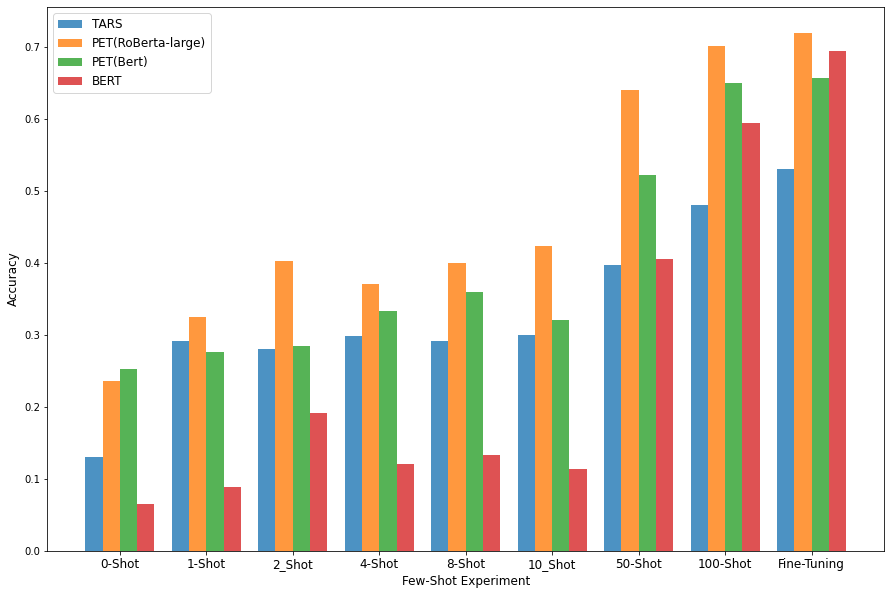

In [7]:
colors = plt.cm.get_cmap('GnBu')
# Using numpy to group 3 different data with bars
plt.figure(figsize=[15, 10])
X = np.arange(len(tars))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
plt.bar(X, tars, width = 0.2,alpha=.8)
plt.bar(X + 0.2, pet_roberta_large, width = 0.2,alpha=.8)
plt.bar(X + 0.4, pet_bert, width = 0.2,alpha=.8)
plt.bar(X + 0.6, bert, width = 0.2,alpha=.8)

# Creating the legend of the bars in the plot
plt.legend(['TARS', 'PET(RoBerta-large)', 'PET(Bert)','BERT'],fontsize='large')
# Overiding the x axis with the country names
plt.xticks([i + 0.3 for i in range(9)], ['0-Shot', '1-Shot', '2_Shot', '4-Shot','8-Shot', '10_Shot','50-Shot','100-Shot','Fine-Tuning'],fontsize='large')
# Giving the tilte for the plot
plt.xlabel('Few-Shot Experiment',fontsize='large')
plt.ylabel('Accuracy',fontsize='large')
# Saving the plot as a 'png'
plt.savefig('few-shot-barplot.pdf')
# Displaying the bar plot
plt.show()

## Plot Full Fine-tuning

In [46]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]/2,y[i],horizontalalignment='center',linespacing=0.5)
        #+std[i]+0.002

In [9]:
acc = [0.213,0.532,0.694,0.714,0.656,0.719]
std = [0.016,0.034,0.009,0.034,0.004,0.001]
label = ['GPT-2','TARS','BERT','GAN-BERT','PET\n(bert-base)','PET\n(roberta-\nlarge)']

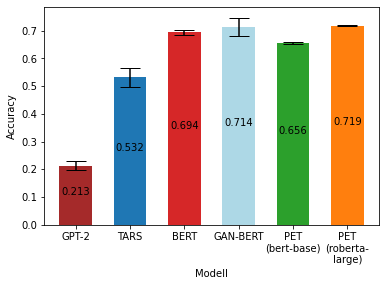

In [60]:
fig, ax = plt.subplots()

# Diagramm erstellen
ax.bar(label, #x-coordinates of bars
       height=acc, #height of bars
       width = 0.6,
       color =['brown', '#1f77b4', '#d62728' ,'lightblue', '#2ca02c','#ff7f0e'],
       yerr=std, #error bar width
       capsize=10,) #length of error bar caps
ax.set_xlabel('Modell')
ax.set_ylabel('Accuracy')
addlabels(label, acc)
plt.savefig('Accuracy_fine_tuning.pdf',bbox_inches="tight")

In [12]:
bert = [0.65714,
        0.62041,
        0.68980,
        0.58367,
        0.63265]
np.average(bert), np.std(bert)

(0.6367339999999999, 0.035584674566447816)